In [1]:
# text 파일 읽어오기
#※※주소불러올때 \를 //로 바꾸어주기※※
blog_text = open('blog_text.txt','rt', encoding='UTF-8').read()

In [2]:
from konlpy.tag import Okt
from collections import Counter

# Okt 함수를 이용해 형태소 분석
okt = Okt()
line =[]

line = okt.pos(blog_text)

n_adj =[]
# 명사 또는 형용사인 단어만 n_adj에 넣어주기
for word, tag in line:
    if tag in ['Noun','Adjective']:
        n_adj.append(word)
print(n_adj)

['감격', '상암', '맛집', '리스트', '눈길', '상암', '맛집', '리스트', '흡족했던', '상암', '맛집', '리스트', '무한', '흡입', '가능한', '상암', '맛집', '행복', '가득한', '상암', '맛집', '모음', '집', '경이', '상암', '맛집', '모음', '쫄깃', '상암', '맛집', '감탄', '절로', '상암', '맛집', '훌륭했던', '상암', '맛집', '리스트', '코스', '요리', '만족', '상암', '파스타', '맛집', '인', '칸토', '키친', '상암', '맛집', '후', '토', '식당', '규', '카츠', '맛있는', '집', '디엠씨', '맛집', '상암', '참치', '방', '주차', '분위기', '좋은', '곳', '깔끔했던', '상암', '맛집', '상암', '상암', '맛집', '모', '유명한', '신선한', '김밥', '상암', '맛집', '월화', '고기', '돼지고기', '여기', '최고', '상암', '카페', '추천', '맛집', '런이트', '위치', '메뉴', '주차', '여전한', '상암', '맛집', '상암', '맛집', '카노', '상암', '맛집', '소담', '가성', '비', '굿', '소갈비', '함흥', '냉면', '맛깔', '스러웠던', '상암', '맛집', '상암', '베리', '코', '상암', '맛집', '베리', '코', '시간', '돼지', '상암', '맛집', '고', '일본', '스테이크', '밥', '상암', '맛집', '건강한', '로봇', '김밥', '그린', '삼겹살', '목', '살이', '땐', '상암', '맛집', '월화', '고기', '상암', '맛집', '소담', '냉면', '갈비', '존맛', '디지털미디어시티역', '밥집', '돈', '산', '상암', '맛집', '고', '상암', '맛집', '자꾸', '상암', '맛집', '청진', '생', '대구', '탕', '상암', '맛집', '나', '알', '마카

In [3]:
#제외할 단어 추가
stop_words = "아니었네요. 있어서 끝 " #추가할 때 띄어쓰기로 추가해주기
stop_words = set(stop_words.split(' '))
# 불용어를 제외한 단어만 남기기
n_adj = [word for word in n_adj if not word in stop_words]

In [4]:
#가장 많이 나온 단어 100개 저장
counts = Counter(n_adj)
tags = counts.most_common(100)

In [6]:
# 이미지 추가(워드크라우드 모양 설정)
import numpy as np
from PIL import Image

mask = Image.new("RGBA",(5000,4500), (255,255,255)) #(2555,2575)는 사진 크기, (255,255,255)는 색을의미
image = Image.open('SouthKorea2.jpg').convert("RGBA")
x,y = image.size
mask.paste(image,(0,0,x,y),image)
mask = np.array(mask)

In [7]:
#from wordcloud import WordCloud

###WordCloud(워드크라우드) 만들기###
#폰트지정
#font='BMDOHYEON.ttf'
#word_cloud = WordCloud(font_path=font, background_color='black',max_font_size=400, mask=mask,colormap='prism').generate_from_frequencies(dict(tags))

# 사이즈 설정 및 화면에 출력
#import matplotlib.pyplot as plt
#plt.figure(figsize=(100,80))
#plt.imshow(word_cloud)
#plt.axis('off')
#워드클라우드 사진으로 저장
#cloud.to_file('상암맛집_wc.png')
#또는
#plt.savefig('상암맛집.png', bbox_inches='tight')
#plt.show()

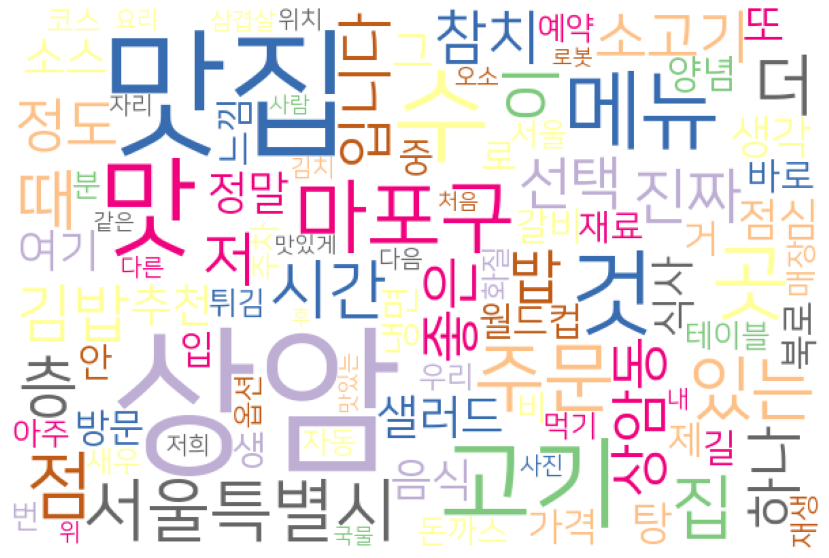

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#wordcloud = WordCloud(font_path = file_path + 'Nanum_Gothic\\NanumGothic-Bold.ttf', background_color='white',colormap = "Accent", width=600, height=400).generate_from_frequencies(dict(tags)) 

font='NanumSquareR.ttf'
wordcloud = WordCloud(font_path=font, background_color='white',colormap = "Accent", width=600, height=400).generate_from_frequencies(dict(tags)) 

plt.figure(figsize=(15,10)) #witdh, height비율은 유지하면서 보여지는 크기 지정
plt.imshow(wordcloud)
plt.axis('off') 
plt.show()